## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

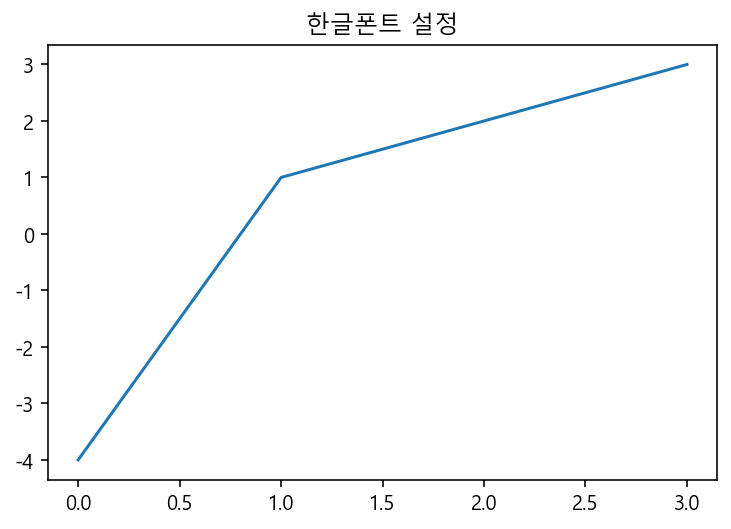

In [3]:
plt.rc('font',family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
plt.title('한글폰트 설정')
plt.plot([-4,1,2,3])

## 데이터 불러오기

In [4]:
df=pd.read_csv('C:/Users/Max/Documents/상가업소정보_201912_01.csv',sep='|')


### 데이터 크기

In [5]:
df.shape

(573680, 39)

### 데이터 정보

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

### 결측치 보기

In [7]:
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          497006
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34390
표준산업분류명       34390
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         98756
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        501692
건물관리번호            0
건물명          308072
도로명주소             0
구우편번호             0
신우편번호             9
동정보          522824
층정보          226553
호정보          488414
경도                0
위도                0
dtype: int64

In [8]:
df.isnull().mean()

상가업소번호       0.000000
상호명          0.000002
지점명          0.866347
상권업종대분류코드    0.000000
상권업종대분류명     0.000000
상권업종중분류코드    0.000000
상권업종중분류명     0.000000
상권업종소분류코드    0.000000
상권업종소분류명     0.000000
표준산업분류코드     0.059946
표준산업분류명      0.059946
시도코드         0.000000
시도명          0.000000
시군구코드        0.000000
시군구명         0.000000
행정동코드        0.000000
행정동명         0.000000
법정동코드        0.000000
법정동명         0.000000
지번코드         0.000000
대지구분코드       0.000000
대지구분명        0.000000
지번본번지        0.000000
지번부번지        0.172145
지번주소         0.000000
도로명코드        0.000000
도로명          0.000000
건물본번지        0.000000
건물부번지        0.874515
건물관리번호       0.000000
건물명          0.537010
도로명주소        0.000000
구우편번호        0.000000
신우편번호        0.000016
동정보          0.911351
층정보          0.394912
호정보          0.851370
경도           0.000000
위도           0.000000
dtype: float64

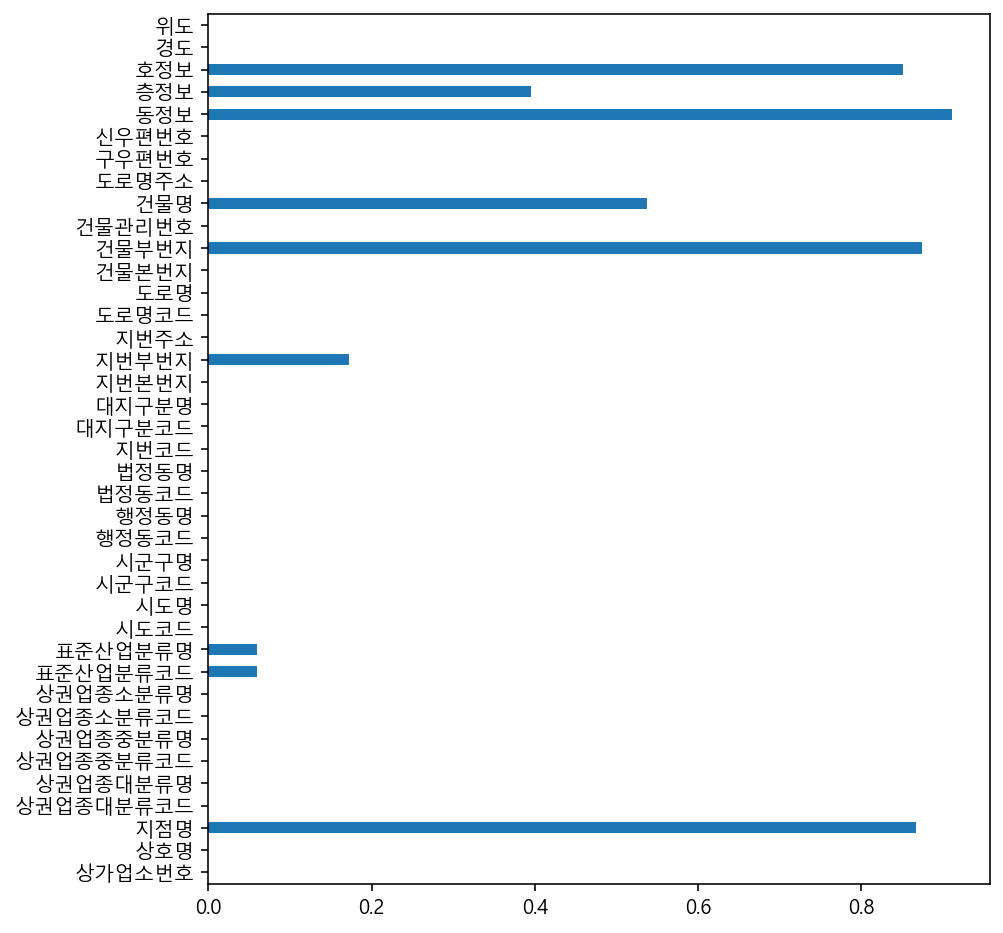

In [9]:
df.isnull().mean().plot.barh(figsize=(7,8))

### 사용하지 않은 칼럼 제거하기

In [10]:
columns = ['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명'
           ,'시도명','시군구명','행정동명','법정동명','도로명주소','경도'
           ,'위도']
print(df.shape)
df=df[columns].copy()
df.shape

(573680, 39)


(573680, 11)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


## 색인으로 서브셋 가져오기

### 서울만 따로 보기

In [12]:
df_seoul = df[df['시도명']=='서울특별시'].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
4       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
5            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
4       서울특별시 송파구 가락로 71  127.104071  37.500249  
5  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

In [13]:
df_seoul['시군구명'].nunique()

25

In [14]:
df_seoul['시군구명'].unique()

array(['강남구', '금천구', '송파구', '광진구', '강서구', '중구', '서초구', '성북구', '구로구',
       '영등포구', '서대문구', '동대문구', '노원구', '동작구', '성동구', '관악구', '강동구', '양천구',
       '종로구', '강북구', '은평구', '중랑구', '도봉구', '마포구', '용산구'], dtype=object)

## 파일로 저장

In [15]:
df_seoul.to_csv('seoul_open_store.csv',index=False)

In [16]:
pd.read_csv('seoul_open_store.csv').head()

상호명 상권업종대분류명  상권업종중분류명     상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
0         와라와라호프       음식      유흥주점        호프/맥주  서울특별시  강남구  대치1동  대치동   
1  커피빈코리아선릉로93길점       음식    커피점/카페  커피전문점/카페/다방  서울특별시  강남구  역삼1동  역삼동   
2           프로포즈       음식      유흥주점        호프/맥주  서울특별시  금천구  독산3동  독산동   
3       가락사우나내스낵    생활서비스  대중목욕탕/휴게   사우나/증기탕/온천  서울특별시  송파구   석촌동  석촌동   
4            초밥왕       음식    일식/수산물     음식점-초밥전문  서울특별시  송파구  잠실6동  신천동   

                   도로명주소          경도         위도  
0   서울특별시 강남구 남부순환로 2933  127.061026  37.493922  
1     서울특별시 강남구 선릉로93길 6  127.047883  37.505675  
2     서울특별시 금천구 가산로 34-6  126.899220  37.471711  
3       서울특별시 송파구 가락로 71  127.104071  37.500249  
4  서울특별시 송파구 올림픽로 293-19  127.102490  37.515149

## 베스킨라빈스, 던킨도너츠 위치 분석

### 특정 상호만 가져오기

In [17]:
df_seoul['상호명_소문자']=df_seoul['상호명'].str.lower()

In [18]:
df_seoul['상호명_소문자'].str.extract('(베|배)스킨라빈스|baskinrobbins').value_counts()

배    347
베    117
dtype: int64

In [19]:
df_seoul[df_seoul['상호명_소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins')].shape

(466, 12)

In [20]:
df_seoul.loc[df_seoul['상호명_소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins'),'상호명_소문자']

76             배스킨라빈스
2164           베스킨라빈스
11060     베스킨라빈스은행나무점
13953          배스킨라빈스
14201          베스킨라빈스
             ...     
557464       배스킨라빈스31
557822       배스킨라빈스31
558006       배스킨라빈스31
561929       배스킨라빈스31
561930       배스킨라빈스31
Name: 상호명_소문자, Length: 466, dtype: object

In [21]:
df_31=df_seoul[df_seoul['상호명_소문자'].str.contains(
    '베스킨라빈스|배스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [22]:
df_31.loc[df_31['상호명_소문자'].str.contains('베스킨라빈스|배스킨라빈스|baskinrobbins'),'브랜드명']='베스킨라빈스'

In [23]:
df_31[['상호명','브랜드명']]

상호명    브랜드명
76             배스킨라빈스  베스킨라빈스
1167            던킨도너츠     NaN
1819      던킨도너츠테크노마트점     NaN
2164           베스킨라빈스  베스킨라빈스
2305       던킨도너츠창동하나로     NaN
...               ...     ...
558894  DUNKINDOONUTS     NaN
560984          던킨도너츠     NaN
561929       배스킨라빈스31  베스킨라빈스
561930       배스킨라빈스31  베스킨라빈스
569825          던킨도너츠     NaN

[657 rows x 2 columns]

In [24]:
#df_31.loc[df_31['상호명_소문자'].str.contains(
#    '던킨|dunkin'),'브랜드명']='던킨'

df_31['브랜드명']=df_31['브랜드명'].fillna('던킨도너츠')
df_31['브랜드명']

76        베스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      베스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    베스킨라빈스
561930    베스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [25]:
df_31[['상호명','브랜드명']]

상호명    브랜드명
76             배스킨라빈스  베스킨라빈스
1167            던킨도너츠   던킨도너츠
1819      던킨도너츠테크노마트점   던킨도너츠
2164           베스킨라빈스  베스킨라빈스
2305       던킨도너츠창동하나로   던킨도너츠
...               ...     ...
558894  DUNKINDOONUTS   던킨도너츠
560984          던킨도너츠   던킨도너츠
561929       배스킨라빈스31  베스킨라빈스
561930       배스킨라빈스31  베스킨라빈스
569825          던킨도너츠   던킨도너츠

[657 rows x 2 columns]

In [26]:
df_31['상권업종대분류명'].value_counts().sort_values(ascending=False)

음식       655
생활서비스      1
소매         1
Name: 상권업종대분류명, dtype: int64

In [27]:
df_31=df_31[-df_31['상권업종대분류명'].isin(['소매','생활서비스'])].copy()

In [28]:
df_31.shape

(655, 13)

### 범주형 값으로 coutplot그리기

In [29]:
brand_count = df_31['브랜드명'].value_counts()

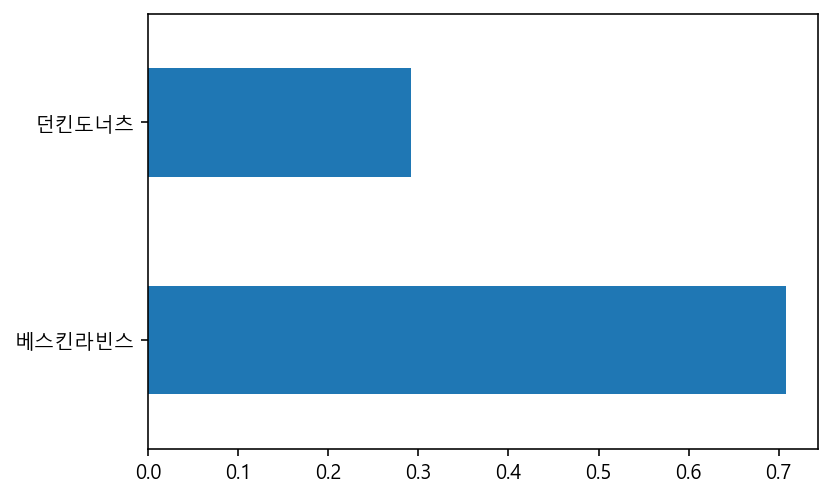

In [30]:
df_31['브랜드명'].value_counts(normalize=True).plot.barh()

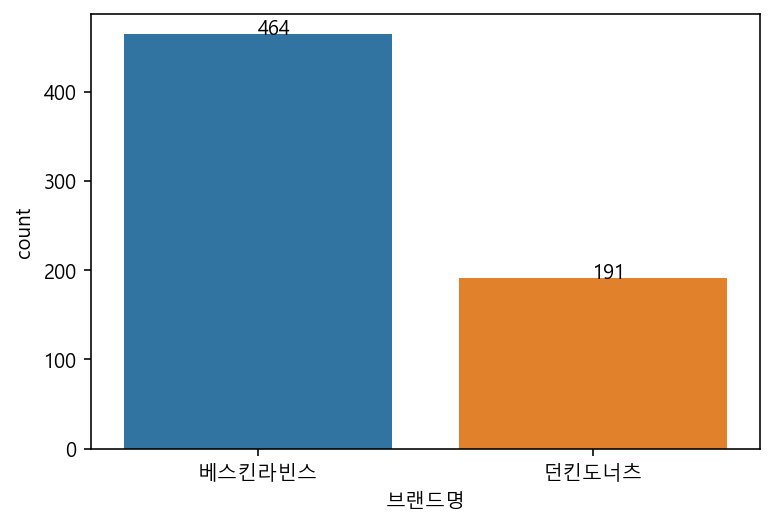

In [31]:
g=sns.countplot(data=df_31, x='브랜드명')

for i,val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])


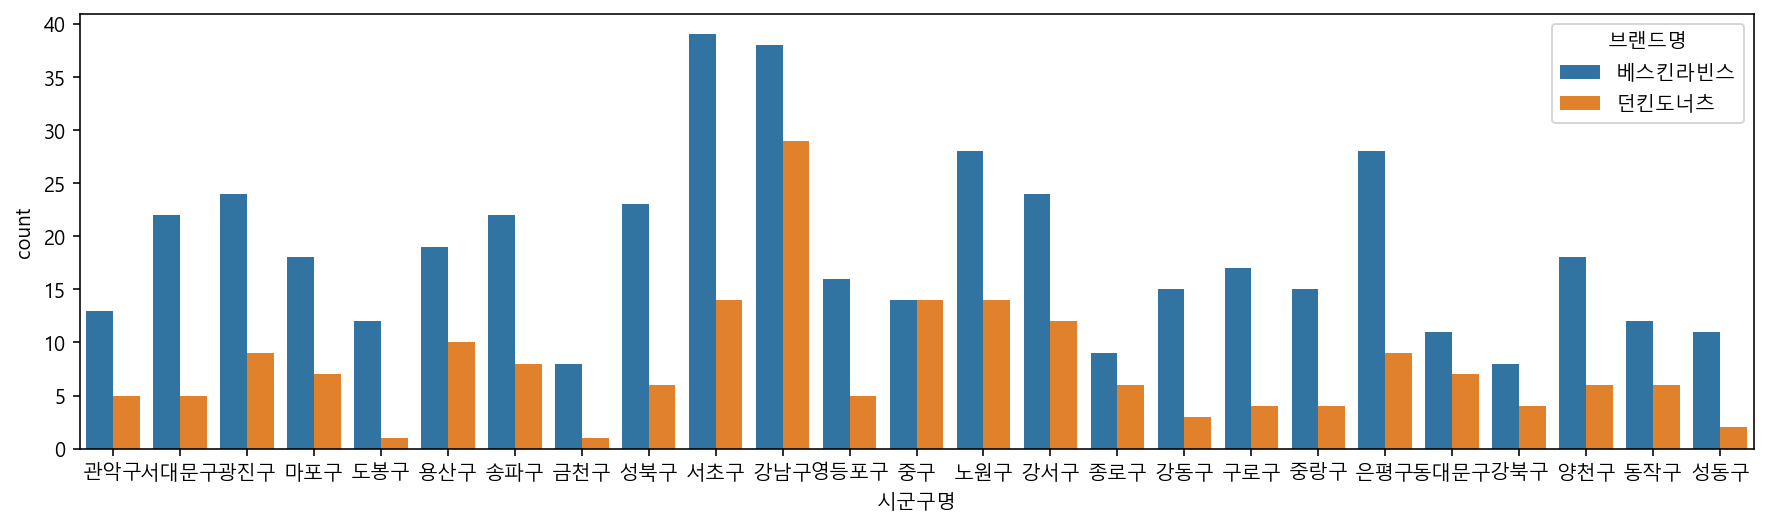

In [32]:
plt.figure(figsize=(15,4))
g=sns.countplot(data=df_31, x='시군구명', hue='브랜드명')

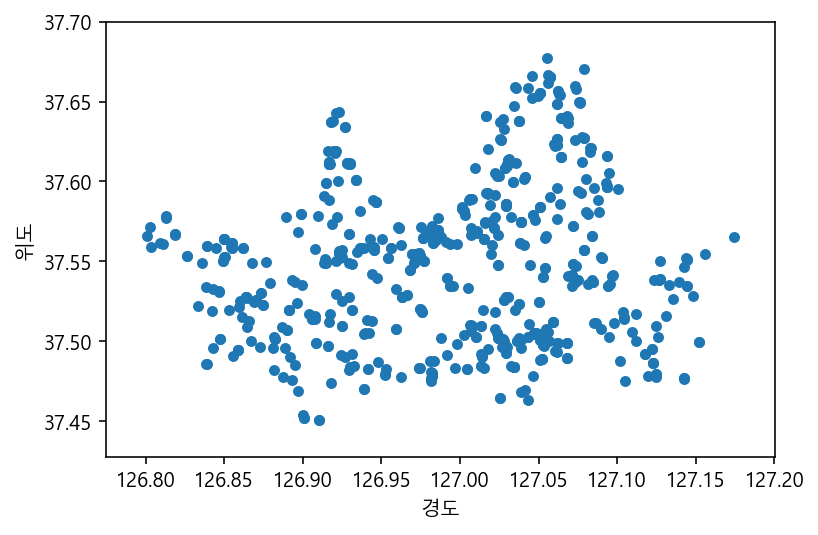

In [33]:
df_31[['위도','경도']].plot.scatter(x='경도',y='위도')

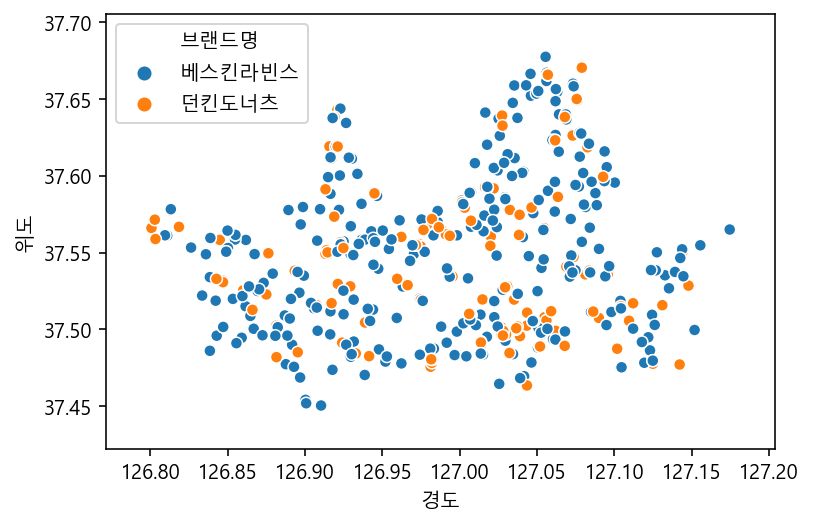

In [34]:
sns.scatterplot(data=df_31, x='경도', y='위도', hue='브랜드명')

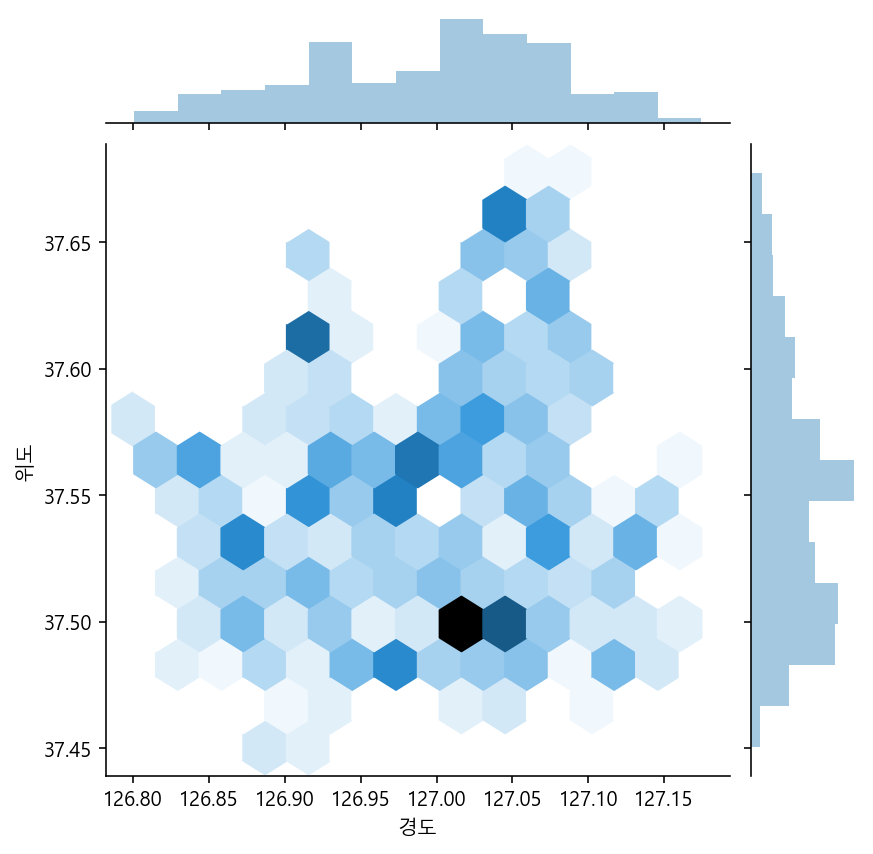

In [35]:
sns.jointplot(data=df_31, x='경도',y='위도',kind='hex')

## Follum으로 지도 활용하기

In [36]:
import folium

In [37]:
df_31[['위도','경도']]

위도          경도
76      37.479599  126.952166
1167    37.559263  126.945369
1819    37.535713  127.095681
2164    37.552104  126.923809
2305    37.655101  127.050818
...           ...         ...
558894  37.495971  127.027989
560984  37.561436  127.038379
561929  37.479617  127.124872
561930  37.564954  127.174586
569825  37.480505  126.981595

[655 rows x 2 columns]

In [38]:
lat = df_31['위도'].mean()
long = df_31['경도'].mean()

In [39]:
m=folium.Map([lat,long])
folium.Marker([37.495593,127.039032]
              ,popup='<i>던킨도너츠<i>'
             ,tooltip='던킨도너츠').add_to(m)

In [40]:
df_31.index

Int64Index([    76,   1167,   1819,   2164,   2305,   2342,   3007,  11060,
             13042,  13925,
            ...
            554896, 555145, 557464, 557822, 558006, 558894, 560984, 561929,
            561930, 569825],
           dtype='int64', length=655)

In [41]:
m.save('index.html')
m

In [42]:
df_31.sample(random_state=31)

상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명    시도명 시군구명  행정동명 법정동명  \
276889  던킨도너츠       음식    패스트푸드    도너츠전문  서울특별시  강남구  역삼1동  역삼동   

                    도로명주소          경도         위도 상호명_소문자   브랜드명  
276889  서울특별시 강남구 논현로 341  127.039032  37.495593   던킨도너츠  던킨도너츠

### 기본 마커로 표현하기

In [43]:
m=folium.Map([lat,long],zoom_start=12)


for i in df_31.index:
    
    sub_lat = df_31.loc[i,'위도']
    sub_long = df_31.loc[i,'경도']
    title=df_31.loc[i,'상호명']+'-'+df_31.loc[i,'도로명주소']
    
    icon_color='blue'
    if df_31.loc[i,'브랜드명'] == '던킨도너츠':
        icon_color='red'
    
    
    folium.Marker(
        [sub_lat,sub_long]
        ,icon=folium.Icon(color=icon_color)
        ,popup=f'<i>{title}<i>'
        ,tooltip=title).add_to(m)

    
    
m.save('index.html')
m

### 마커 클러스터

In [44]:
from folium.plugins import MarkerCluster

In [45]:
m=folium.Map([lat,long],zoom_start=12)
marker_cluster=MarkerCluster().add_to(m)

for i in df_31.index:
    
    sub_lat = df_31.loc[i,'위도']
    sub_long = df_31.loc[i,'경도']
    title=df_31.loc[i,'상호명']+'-'+df_31.loc[i,'도로명주소']
    
    icon_color='blue'
    if df_31.loc[i,'브랜드명'] == '던킨도너츠':
        icon_color='red'
    
    
    folium.Marker(
        [sub_lat,sub_long]
        ,icon=folium.Icon(color=icon_color)
        ,popup=f'<i>{title}<i>'
        ,tooltip=title).add_to(marker_cluster)

    
    
m.save('index.html')
m

## 파리바게트와 뚜레주르 분석하기

### 데이터 색인으로 가져오기

In [46]:
df_seoul['상호명'].str.extract('뚜레(주|쥬)르')[0].value_counts()

쥬    257
주      1
Name: 0, dtype: int64

In [47]:
df_bread = df_seoul[df_seoul['상호명'].str.contains(
    '뚜레(주|쥬)르|파리(바게|크라상)')].copy()
df_bread.shape

C:\Users\Max\Anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(825, 12)

### 가져온 데이터가 맞는지 확인하기

In [48]:
df_bread['상권업종대분류명'].value_counts()

음식       823
학문/교육      2
Name: 상권업종대분류명, dtype: int64

In [49]:
print(df_bread.shape)
df_bread=df_bread[df_bread['상권업종대분류명'] != '학문/교육'].copy()
print(df_bread.shape)

(825, 12)
(823, 12)


In [50]:
df_bread['상호명'].unique

<bound method Series.unique of 2935             뚜레쥬르
13843            뚜레쥬르
14031     파리바게뜨길동사거리점
14229      파리바게뜨상계제일점
14246       뚜레쥬르중계브라운
             ...     
559820          파리바게뜨
561538          파리바게뜨
561810          파리바게뜨
569327          파리바게뜨
569479          파리바게뜨
Name: 상호명, Length: 823, dtype: object>

In [51]:
print(df_bread.shape)
df_bread = df_bread[-df_bread['상호명'].str.contains(
    '파스쿠찌|잠바주스')]
print(df_bread.shape)

(823, 12)
(812, 12)


In [52]:
df_bread.loc[df_bread['상호명'].str.contains('파리바게'),'브랜드명'] = '파리바게뜨'
df_bread[['상호명','브랜드명']].head()

상호명   브랜드명
2935          뚜레쥬르    NaN
13843         뚜레쥬르    NaN
14031  파리바게뜨길동사거리점  파리바게뜨
14229   파리바게뜨상계제일점  파리바게뜨
14246    뚜레쥬르중계브라운    NaN

In [53]:
df_bread['브랜드명']=df_bread['브랜드명'].fillna('뚜레쥬르')
df_bread[['상호명','브랜드명']].head()

상호명   브랜드명
2935          뚜레쥬르   뚜레쥬르
13843         뚜레쥬르   뚜레쥬르
14031  파리바게뜨길동사거리점  파리바게뜨
14229   파리바게뜨상계제일점  파리바게뜨
14246    뚜레쥬르중계브라운   뚜레쥬르

### 범주형 변수 빈도수 계산하기

In [54]:
df_bread['브랜드명']

2935       뚜레쥬르
13843      뚜레쥬르
14031     파리바게뜨
14229     파리바게뜨
14246      뚜레쥬르
          ...  
559820    파리바게뜨
561538    파리바게뜨
561810    파리바게뜨
569327    파리바게뜨
569479    파리바게뜨
Name: 브랜드명, Length: 812, dtype: object

In [55]:
df_bread['브랜드명'].value_counts()

파리바게뜨    515
뚜레쥬르     297
Name: 브랜드명, dtype: int64

In [56]:
df_bread['브랜드명'].value_counts(normalize=True)

파리바게뜨    0.634236
뚜레쥬르     0.365764
Name: 브랜드명, dtype: float64

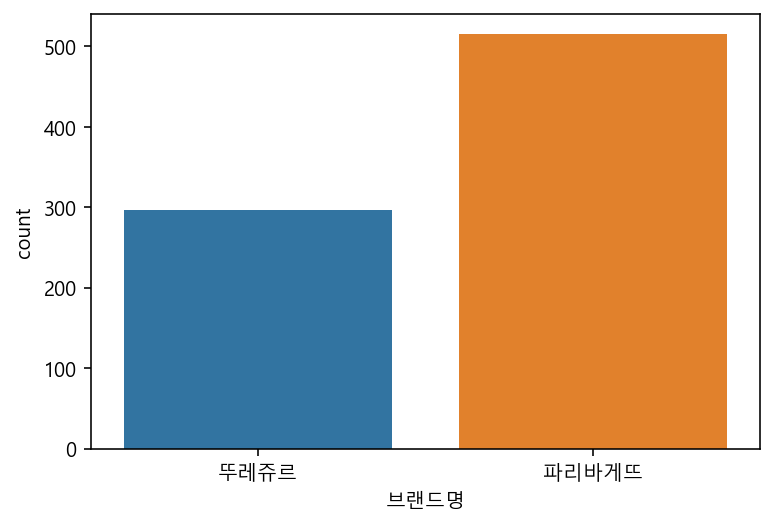

In [57]:
sns.countplot(data=df_bread,x='브랜드명')

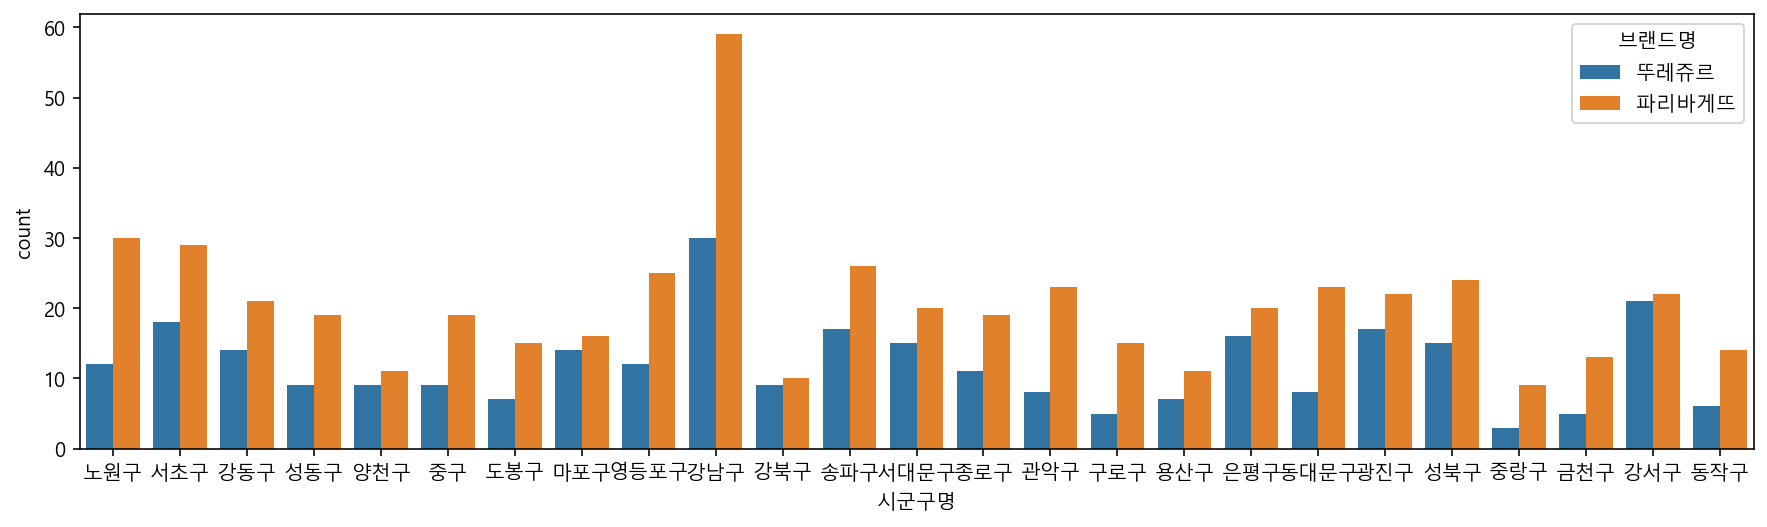

In [58]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_bread, x='시군구명', hue='브랜드명')

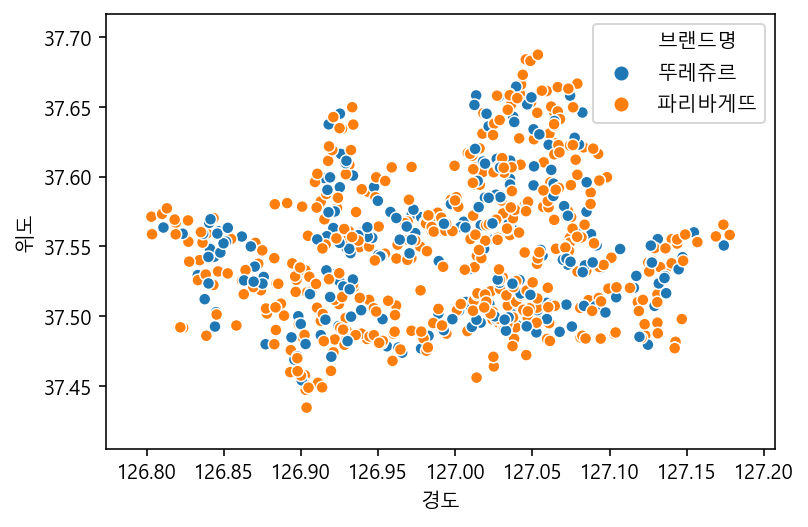

In [59]:
sns.scatterplot(data=df_bread, x='경도', y='위도', hue='브랜드명')

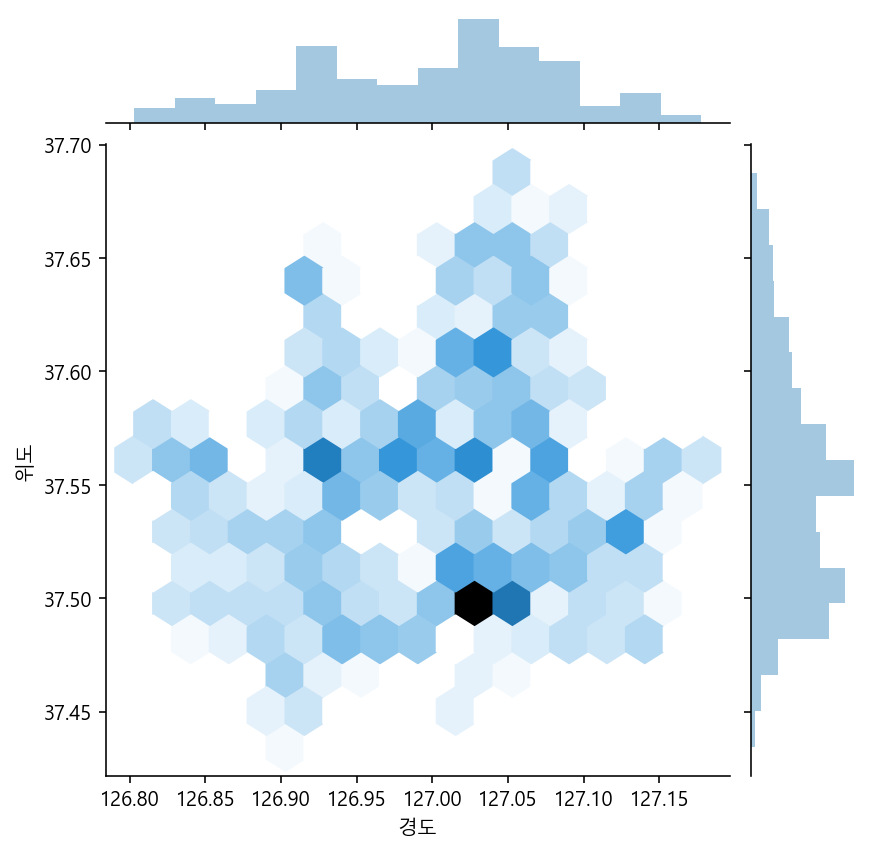

In [60]:
sns.jointplot(data=df_bread,x='경도',y='위도', kind='hex')

## 지도에 표현하기

### Marker로 위치를 찍어보기

In [61]:
df_bread.index

Int64Index([  2935,  13843,  14031,  14229,  14246,  14713,  14842,  14889,
             14897,  15019,
            ...
            544366, 544527, 551365, 555475, 556168, 559820, 561538, 561810,
            569327, 569479],
           dtype='int64', length=812)

In [62]:
df_bread.loc[2935,'위도']

37.62828881495879

In [63]:
m=folium.Map([lat,long],zoom_start=12, tiles='stamen toner')

for i in df_bread.index:
    sub_lat = df_bread.loc[i,'위도']
    sub_long = df_bread.loc[i,'경도']
    
    title = df_bread.loc[i,'상호명']+'-'+df_bread.loc[i,'도로명주소']
    
    icon_color='blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color = 'green'
        
    folium.CircleMarker(
        [sub_lat,sub_long],
        radius=3,
        color=icon_color,
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(m)


m.save('index_bread.html')
m

###  Marker Cluster

In [64]:
m=folium.Map([lat,long],zoom_start=12, tiles='stamen toner')

marker_cluster = MarkerCluster().add_to(m)

for i in df_bread.index:
    sub_lat = df_bread.loc[i,'위도']
    sub_long = df_bread.loc[i,'경도']
    
    title = df_bread.loc[i,'상호명']+'-'+df_bread.loc[i,'도로명주소']
    
    icon_color='blue'
    if df_bread.loc[i, '브랜드명']=='뚜레쥬르':
        icon_color = 'green'
        
    folium.CircleMarker(
        [sub_lat,sub_long],
        radius=3,
        color=icon_color,
        icon=folium.Icon(color=icon_color),
        popup=f'<i>{title}</i>',
        tooltip=title).add_to(marker_cluster)


m.save('index_bread.html')
m

In [66]:
from folium.plugins import HeatMap

In [67]:
data = (
    np.random.normal(size=(100,3))*
    np.array([[1,1,1]])+
    np.array([[48,5,1]])
).tolist()
data[:5]

[[48.01503031047888, 4.925704659992249, 2.0150743380829255],
 [46.53180854150788, 5.834774208065185, 0.06237014927826767],
 [48.225476836381496, 5.406029915260321, 0.18987287524596974],
 [49.06809684186444, 5.367872093237309, 0.01194747282370845],
 [47.38369499502957, 5.293868740238336, -0.1338631465325495]]

In [68]:
heat = df_bread[['위도','경도','브랜드명']].copy()
heat['브랜드명'] = heat['브랜드명'].replace('뚜레쥬르',1).replace('파리바게뜨',2)
heat=heat.values

In [69]:
from folium.plugins import HeatMap

m= folium.Map([lat,long], tiles='stamentoner', zoom_start=12)

HeatMap(heat).add_to(m)

m.save('heatmap.html')
m